# Time Series Forecasting Practice Exercise

In this practice exercise, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in the `Datasets` file with the name `Aquifer_Petrignano` the target is to predict `Depth_to_Groundwater_P24` column.

## Dataset: Aquifer Petrignano

### Dataset Overview:

- **Name**: Aquifer Petrignano
- **Description**: This dataset contains time series data related to groundwater levels, rainfall, temperature, and hydrometry in the Aquifer Petrignano region. The data is collected over multiple years, capturing various environmental measurements. It is particularly useful for modeling groundwater levels, climate analysis, and time series forecasting.
- **Time Period**: Starting from 14/03/2006
- **Frequency**: Daily observations

### Features:

1. **Date**: The date of the observation in `DD/MM/YYYY` format.
2. **Rainfall_Bastia_Umbra**: Daily rainfall measurement in the Bastia Umbra region (mm).
3. **Depth_to_Groundwater_P24**: Depth to groundwater at observation point P24 (meters).
4. **Depth_to_Groundwater_P25**: Depth to groundwater at observation point P25 (meters).
5. **Temperature_Bastia_Umbra**: Daily temperature in the Bastia Umbra region (°C).
6. **Temperature_Petrignano**: Daily temperature in the Petrignano region (°C).
7. **Volume_C10_Petrignano**: Water volume measured at station C10 in Petrignano (m³).
8. **Hydrometry_Fiume_Chiascio_Petrignano**: Hydrometry measurements of the Fiume Chiascio river in Petrignano (m).


## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [280]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
import datetime as dt
import tensorflow as tf
from keras.layers import Dense, Dropout, SimpleRNN, LSTM, GRU
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error

In [281]:
df = pd.read_csv('D:\\Tuwaiq Academy\\Tuwaiq_Academy_T5_Week_5\\Practice Exercise\\Datasets\\Aquifer_Petrignano.csv')
df

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,28/07/2009,0.0,-28.90,-28.12,27.4,25.6,-34833.888,1.9
1,21/06/2015,0.0,-20.79,-20.45,20.8,0.0,-18681.408,0.0
2,10/10/2019,0.0,-27.36,-26.75,20.3,20.0,-28288.224,2.3
3,09/12/2011,0.0,-27.78,-26.98,9.2,8.8,-37215.072,2.0
4,20/09/2011,1.0,-26.09,-25.55,15.7,15.7,-30856.896,2.0
...,...,...,...,...,...,...,...,...
5218,24/01/2018,0.0,-27.82,-27.31,5.4,5.3,-29072.736,2.7
5219,13/02/2008,NaN,-31.30,-30.63,NaN,NaN,-32861.376,NaN
5220,06/06/2009,0.0,-27.97,-27.36,22.5,21.4,-31509.216,2.1
5221,25/03/2008,NaN,-31.07,-30.52,NaN,NaN,-27031.104,NaN


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use seasonal_decompose from the statsmodels library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [282]:
df.dtypes

Date                                     object
Rainfall_Bastia_Umbra                   float64
Depth_to_Groundwater_P24                float64
Depth_to_Groundwater_P25                float64
Temperature_Bastia_Umbra                float64
Temperature_Petrignano                  float64
Volume_C10_Petrignano                   float64
Hydrometry_Fiume_Chiascio_Petrignano    float64
dtype: object

In [283]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

C:\Users\abo_O\AppData\Local\Temp\ipykernel_11616\748457276.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


Date                                    datetime64[ns]
Rainfall_Bastia_Umbra                          float64
Depth_to_Groundwater_P24                       float64
Depth_to_Groundwater_P25                       float64
Temperature_Bastia_Umbra                       float64
Temperature_Petrignano                         float64
Volume_C10_Petrignano                          float64
Hydrometry_Fiume_Chiascio_Petrignano           float64
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

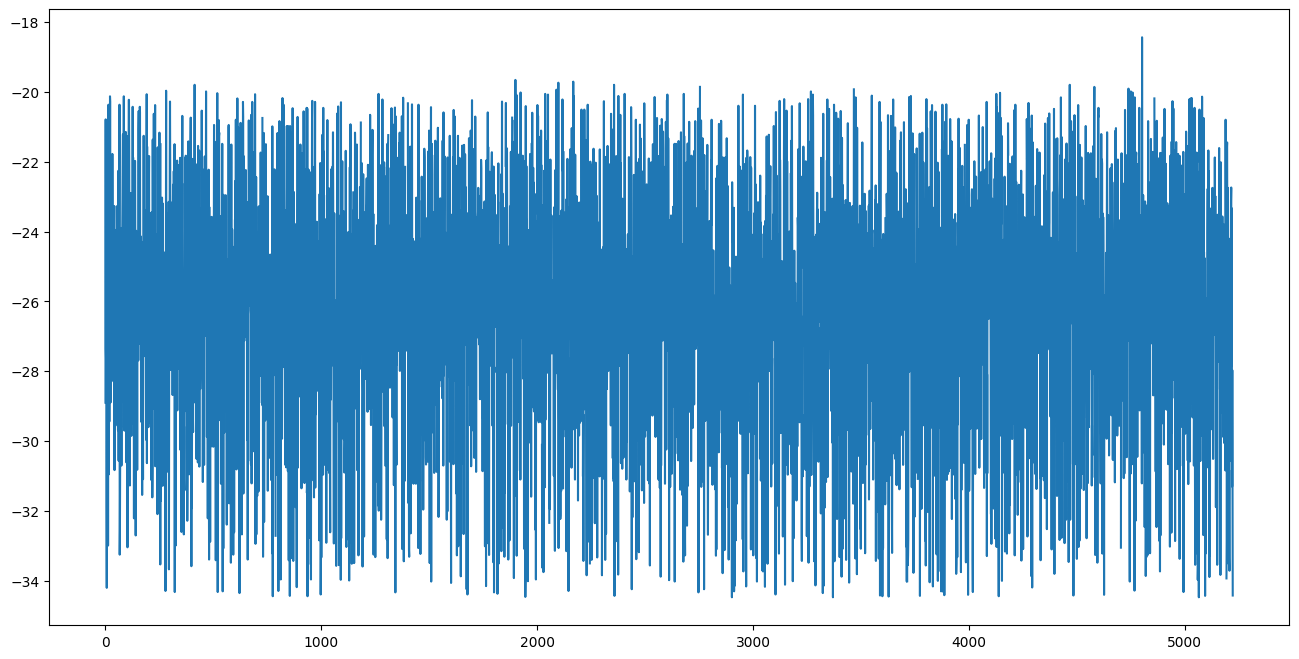

In [284]:
df['Depth_to_Groundwater_P24'].plot(figsize=(16,8))
plt.show

In [285]:
df

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,2009-07-28,0.0,-28.90,-28.12,27.4,25.6,-34833.888,1.9
1,2015-06-21,0.0,-20.79,-20.45,20.8,0.0,-18681.408,0.0
2,2019-10-10,0.0,-27.36,-26.75,20.3,20.0,-28288.224,2.3
3,2011-12-09,0.0,-27.78,-26.98,9.2,8.8,-37215.072,2.0
4,2011-09-20,1.0,-26.09,-25.55,15.7,15.7,-30856.896,2.0
...,...,...,...,...,...,...,...,...
5218,2018-01-24,0.0,-27.82,-27.31,5.4,5.3,-29072.736,2.7
5219,2008-02-13,NaN,-31.30,-30.63,NaN,NaN,-32861.376,NaN
5220,2009-06-06,0.0,-27.97,-27.36,22.5,21.4,-31509.216,2.1
5221,2008-03-25,NaN,-31.07,-30.52,NaN,NaN,-27031.104,NaN


In [286]:
df.sort_values(by=['Date'], ascending=True, inplace=True)
df

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
331,2006-03-14,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1525,2006-03-15,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
852,2006-03-16,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
2448,2006-03-17,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
1984,2006-03-18,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5083,2020-06-26,0.0,-25.68,-25.07,25.7,24.5,-29930.688,2.5
4080,2020-06-27,0.0,-25.80,-25.11,26.2,25.0,-31332.960,2.4
2092,2020-06-28,0.0,-25.80,-25.19,26.9,25.7,-32120.928,2.4
5015,2020-06-29,0.0,-25.78,-25.18,26.9,26.0,-30602.880,2.4


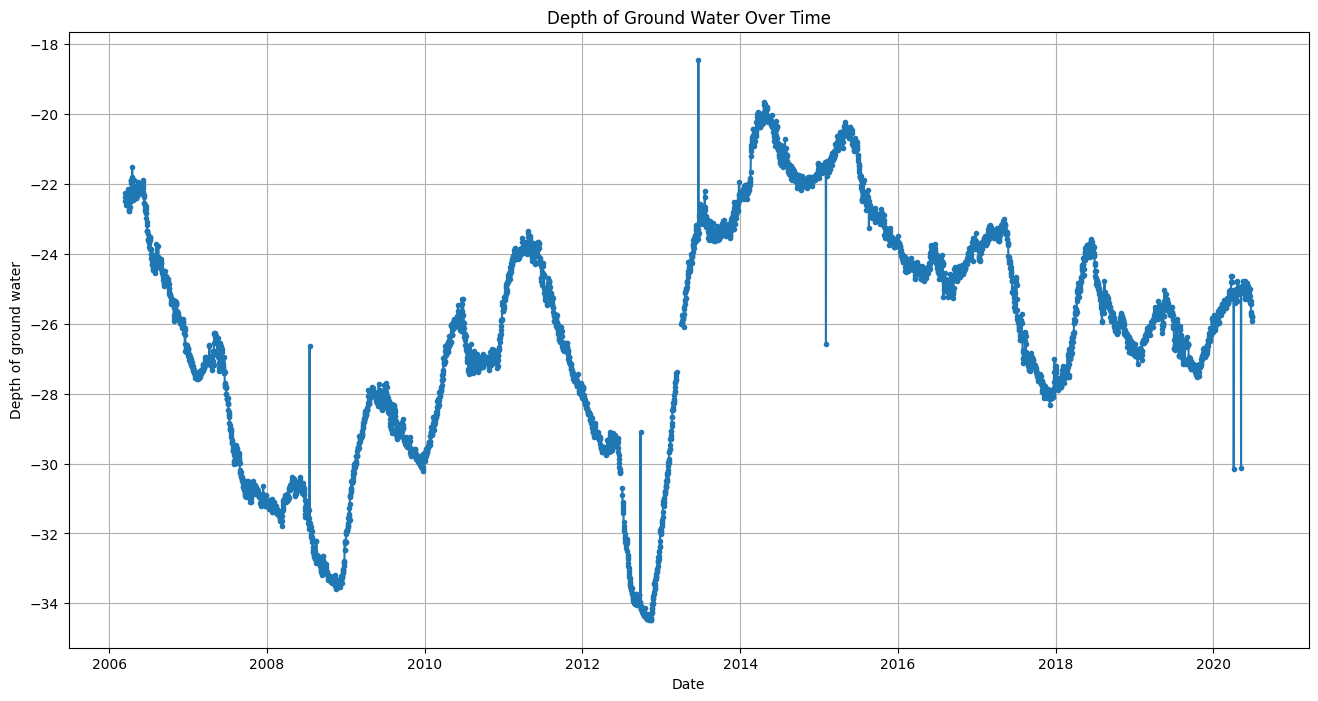

In [287]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Depth_to_Groundwater_P24'], marker='.')
plt.title('Depth of Ground Water Over Time')
plt.xlabel('Date')
plt.ylabel('Depth of ground water')
plt.grid(True)
plt.show()

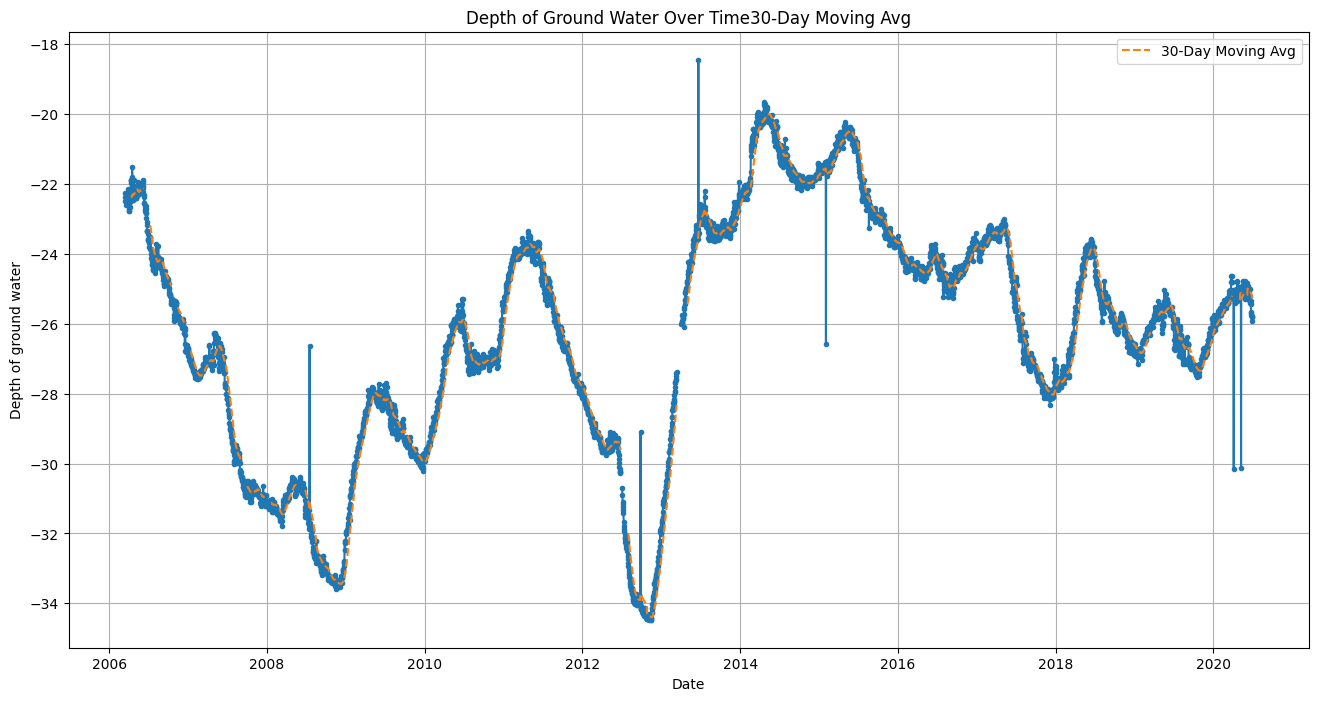

In [288]:
window = 30
plt.figure(figsize=(16,8))
plt.plot(df['Date'], df['Depth_to_Groundwater_P24'], marker='.')
plt.plot(df['Date'], df['Depth_to_Groundwater_P24'].rolling(window=window).mean(),label=f'{window}-Day Moving Avg', linestyle='--')
plt.title(f'Depth of Ground Water Over Time{window}-Day Moving Avg')
plt.xlabel('Date')
plt.ylabel('Depth of ground water')
plt.legend()
plt.grid(True)
plt.show()

In [289]:
df.columns

Index(['Date', 'Rainfall_Bastia_Umbra', 'Depth_to_Groundwater_P24',
       'Depth_to_Groundwater_P25', 'Temperature_Bastia_Umbra',
       'Temperature_Petrignano', 'Volume_C10_Petrignano',
       'Hydrometry_Fiume_Chiascio_Petrignano'],
      dtype='object')

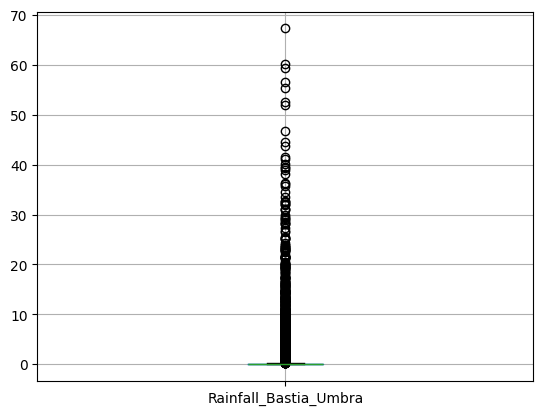

In [290]:
df.boxplot(column=['Rainfall_Bastia_Umbra'])
plt.show()

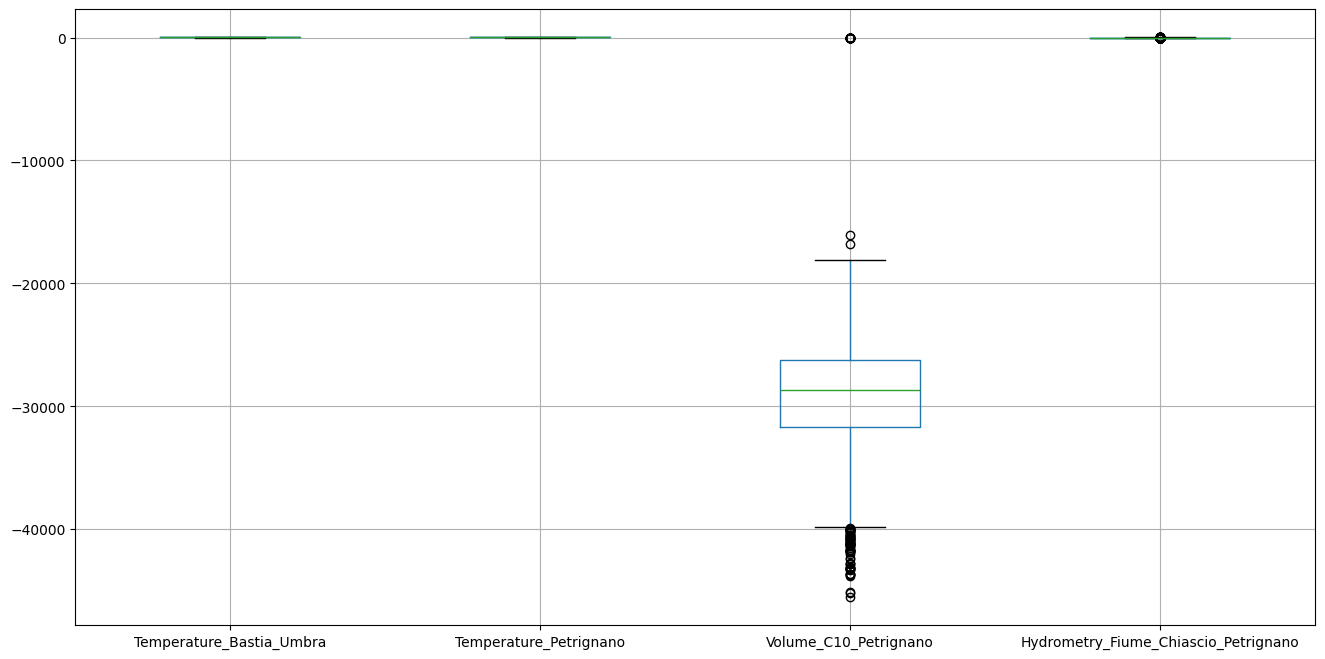

In [291]:
df.boxplot(figsize=(16,8), column=['Temperature_Bastia_Umbra',
       'Temperature_Petrignano', 'Volume_C10_Petrignano',
       'Hydrometry_Fiume_Chiascio_Petrignano'])
plt.show()

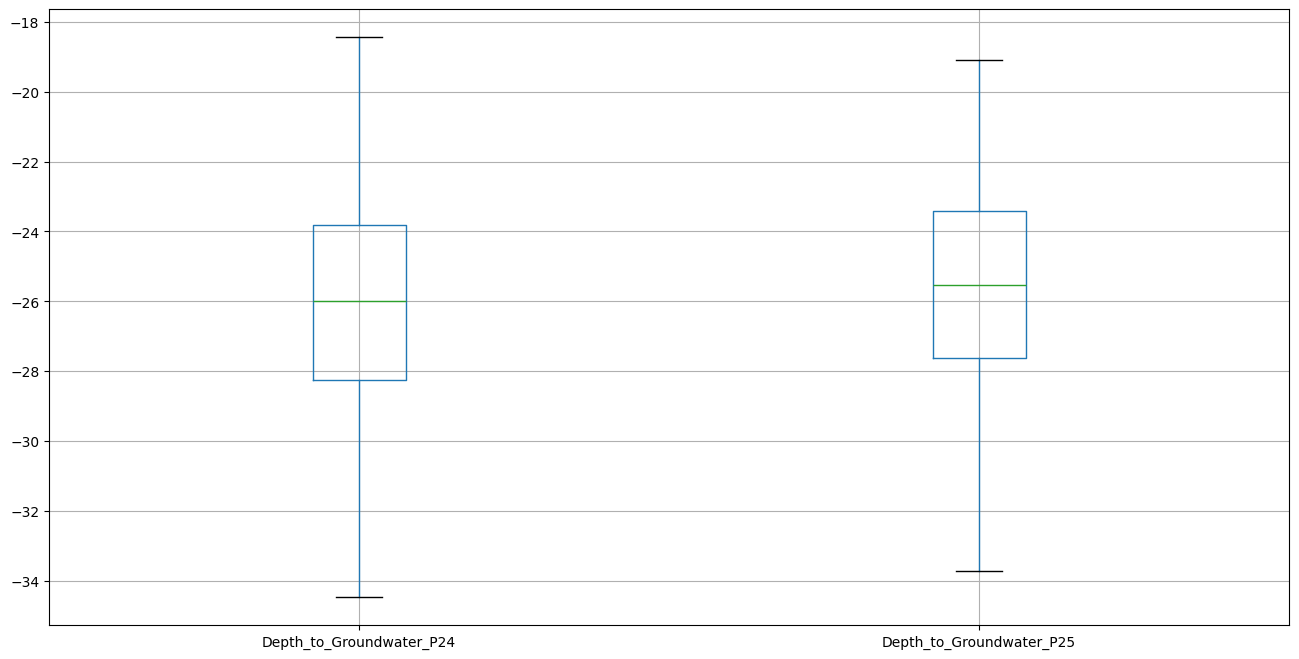

In [292]:
df.boxplot(figsize=(16,8), column=['Depth_to_Groundwater_P24','Depth_to_Groundwater_P25'])
plt.show()


In [293]:
n_df = df.copy()

In [294]:
n_df.dtypes

Date                                    datetime64[ns]
Rainfall_Bastia_Umbra                          float64
Depth_to_Groundwater_P24                       float64
Depth_to_Groundwater_P25                       float64
Temperature_Bastia_Umbra                       float64
Temperature_Petrignano                         float64
Volume_C10_Petrignano                          float64
Hydrometry_Fiume_Chiascio_Petrignano           float64
dtype: object

In [295]:
n_df.set_index('Date', inplace=True)

In [296]:
n_df.columns

Index(['Rainfall_Bastia_Umbra', 'Depth_to_Groundwater_P24',
       'Depth_to_Groundwater_P25', 'Temperature_Bastia_Umbra',
       'Temperature_Petrignano', 'Volume_C10_Petrignano',
       'Hydrometry_Fiume_Chiascio_Petrignano'],
      dtype='object')

In [297]:
n_df.drop(columns=['Rainfall_Bastia_Umbra',
       'Depth_to_Groundwater_P25', 'Temperature_Bastia_Umbra',
       'Temperature_Petrignano', 'Volume_C10_Petrignano',
       'Hydrometry_Fiume_Chiascio_Petrignano'], axis=1, inplace=True)
n_df

,Depth_to_Groundwater_P24
Date,
2006-03-14,-22.48
2006-03-15,-22.38
2006-03-16,-22.25
2006-03-17,-22.38
2006-03-18,-22.60
...,...
2020-06-26,-25.68
2020-06-27,-25.80
2020-06-28,-25.80


In [298]:
n_df.isna().sum()

Depth_to_Groundwater_P24    55
dtype: int64

In [299]:
n_df.dropna(inplace=True)
n_df.isna().sum()

Depth_to_Groundwater_P24    0
dtype: int64

In [300]:
from statsmodels.tsa.api import ExponentialSmoothing

model_triple = ExponentialSmoothing(n_df, seasonal_periods=12, trend='add', seasonal='add')

model_triple_fit = model_triple.fit()

C:\Users\abo_O\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [301]:
forecast_triple = model_triple_fit.forecast(6)
print(forecast_triple)

5168   -25.826541
5169   -25.851096
5170   -25.864137
5171   -25.867312
5172   -25.894768
5173   -25.895973
dtype: float64


C:\Users\abo_O\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\abo_O\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [302]:
forecast_triple = model_triple_fit.forecast(80)
# print(forecast_triple)

C:\Users\abo_O\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\abo_O\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


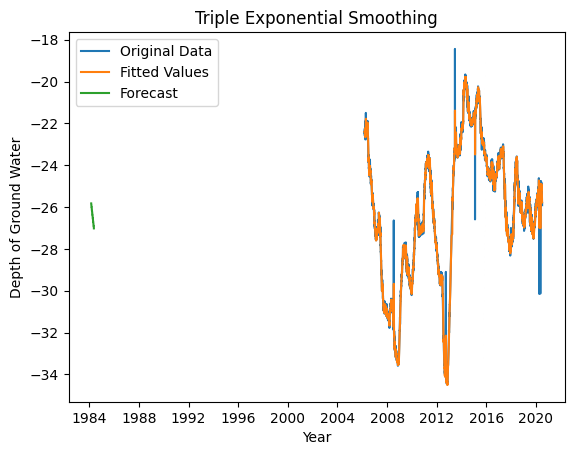

In [303]:
plt.plot(n_df, label='Original Data')
plt.plot(model_triple_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_triple, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Depth of Ground Water')
plt.title('Triple Exponential Smoothing')
plt.legend()
plt.show()


## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [304]:
df.isna().sum()

Date                                       0
Rainfall_Bastia_Umbra                   1024
Depth_to_Groundwater_P24                  55
Depth_to_Groundwater_P25                  39
Temperature_Bastia_Umbra                1024
Temperature_Petrignano                  1024
Volume_C10_Petrignano                    198
Hydrometry_Fiume_Chiascio_Petrignano    1024
dtype: int64

In [305]:
df.fillna(method='pad',inplace=True)
df.isna().sum()

C:\Users\abo_O\AppData\Local\Temp\ipykernel_11616\1698150463.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='pad',inplace=True)


Date                                       0
Rainfall_Bastia_Umbra                   1024
Depth_to_Groundwater_P24                   0
Depth_to_Groundwater_P25                   0
Temperature_Bastia_Umbra                1024
Temperature_Petrignano                  1024
Volume_C10_Petrignano                    197
Hydrometry_Fiume_Chiascio_Petrignano    1024
dtype: int64

In [306]:
df.dropna(inplace=True)
df.isna().sum()

Date                                    0
Rainfall_Bastia_Umbra                   0
Depth_to_Groundwater_P24                0
Depth_to_Groundwater_P25                0
Temperature_Bastia_Umbra                0
Temperature_Petrignano                  0
Volume_C10_Petrignano                   0
Hydrometry_Fiume_Chiascio_Petrignano    0
dtype: int64

In [307]:
df.shape

(4199, 8)

In [308]:
lags = [1, 2, 3]

for lag in lags:
    df[f'Depth_to_Groundwater_P24_lag{lag}'] = df['Depth_to_Groundwater_P24'].shift(lag)

In [309]:
windows = [3, 7, 14]

for window in windows:
    df[f'Depth_to_Groundwater_P24_ma{window}'] = df['Depth_to_Groundwater_P24'].rolling(window=window).mean()

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `Prev_Depth_to_Groundwater_P24`, which represents the previous day's groundwater depth. This helps capture the effect of past values on current observations.

- **Date Features**: Extract meaningful time-based features from the `Date` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.
  - **IsWeekend**: A binary feature that distinguishes between weekdays and weekends.
  - **Difference between Depth_to_Groundwater_P24**: Calculate the difference between consecutive values in the `Depth_to_Groundwater_P24` column to highlight short-term changes in groundwater depth.

In [310]:
df['prev_Depth_to_Groundwater_P24'] = df['Depth_to_Groundwater_P24'].shift(1)


In [311]:
df['Day_of_Week'] = df['Date'].dt.day_of_week
df['Month'] = df['Date'].dt.month
df['Day_of_Year'] = df['Date'].dt.day_of_year
df['isWeekend'] = df['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)
df['Diff_Depth_of_Groundwtaer_p24'] = df['Depth_to_Groundwater_P24'].diff()

In [312]:
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano,Depth_to_Groundwater_P24_lag1,Depth_to_Groundwater_P24_lag2,Depth_to_Groundwater_P24_lag3,Depth_to_Groundwater_P24_ma3,Depth_to_Groundwater_P24_ma7,Depth_to_Groundwater_P24_ma14,prev_Depth_to_Groundwater_P24,Day_of_Week,Month,Day_of_Year,isWeekend,Diff_Depth_of_Groundwtaer_p24
1472,2009-01-01,0.0,-31.96,-31.14,5.2,4.9,-24530.688,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,1,0,NaN
3643,2009-01-02,0.0,-32.03,-31.11,2.3,2.5,-28785.888,2.5,-31.96,NaN,NaN,NaN,NaN,NaN,-31.96,4,1,2,0,-0.07
2858,2009-01-03,0.0,-31.97,-31.07,4.4,3.9,-25766.208,2.4,-32.03,-31.96,NaN,-31.986667,NaN,NaN,-32.03,5,1,3,1,0.06
1374,2009-01-04,0.0,-31.91,-31.05,0.8,0.8,-27919.296,2.4,-31.97,-32.03,-31.96,-31.970000,NaN,NaN,-31.97,6,1,4,1,0.06
3945,2009-01-05,0.0,-31.94,-31.01,-1.9,-2.1,-29854.656,2.3,-31.91,-31.97,-32.03,-31.940000,NaN,NaN,-31.91,0,1,5,0,-0.03


In [313]:
df.isna().sum()

Date                                     0
Rainfall_Bastia_Umbra                    0
Depth_to_Groundwater_P24                 0
Depth_to_Groundwater_P25                 0
Temperature_Bastia_Umbra                 0
Temperature_Petrignano                   0
Volume_C10_Petrignano                    0
Hydrometry_Fiume_Chiascio_Petrignano     0
Depth_to_Groundwater_P24_lag1            1
Depth_to_Groundwater_P24_lag2            2
Depth_to_Groundwater_P24_lag3            3
Depth_to_Groundwater_P24_ma3             2
Depth_to_Groundwater_P24_ma7             6
Depth_to_Groundwater_P24_ma14           13
prev_Depth_to_Groundwater_P24            1
Day_of_Week                              0
Month                                    0
Day_of_Year                              0
isWeekend                                0
Diff_Depth_of_Groundwtaer_p24            1
dtype: int64

In [314]:
df.dropna(inplace=True)
df.isna().sum()

Date                                    0
Rainfall_Bastia_Umbra                   0
Depth_to_Groundwater_P24                0
Depth_to_Groundwater_P25                0
Temperature_Bastia_Umbra                0
Temperature_Petrignano                  0
Volume_C10_Petrignano                   0
Hydrometry_Fiume_Chiascio_Petrignano    0
Depth_to_Groundwater_P24_lag1           0
Depth_to_Groundwater_P24_lag2           0
Depth_to_Groundwater_P24_lag3           0
Depth_to_Groundwater_P24_ma3            0
Depth_to_Groundwater_P24_ma7            0
Depth_to_Groundwater_P24_ma14           0
prev_Depth_to_Groundwater_P24           0
Day_of_Week                             0
Month                                   0
Day_of_Year                             0
isWeekend                               0
Diff_Depth_of_Groundwtaer_p24           0
dtype: int64

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [315]:
new_df = df.reset_index()['Depth_to_Groundwater_P24']
new_df

0      -31.44
1      -31.26
2      -31.50
3      -31.61
4      -31.15
        ...  
4181   -25.68
4182   -25.80
4183   -25.80
4184   -25.78
4185   -25.91
Name: Depth_to_Groundwater_P24, Length: 4186, dtype: float64

In [316]:
train_size = int(len(new_df) * 0.8)  # 80% for training
train_size

3348

In [317]:
train_data, test_data = new_df[:train_size], new_df[train_size:]

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [318]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_data=scaler.fit_transform(np.array(train_data).reshape(-1,1))
test_data= scaler.transform(np.array(test_data).reshape(-1,1))
train_data, test_data

(array([[0.18902059],
        [0.20024953],
        [0.1852776 ],
        ...,
        [0.47910168],
        [0.47286338],
        [0.48783531]]),
 array([[0.48783531],
        [0.47660636],
        [0.50218341],
        [0.50280724],
        [0.5040549 ],
        [0.49532127],
        [0.50717405],
        [0.51154086],
        [0.5040549 ],
        [0.51154086],
        [0.51341235],
        [0.52963194],
        [0.5371179 ],
        [0.52900811],
        [0.53524641],
        [0.53337492],
        [0.54647536],
        [0.5577043 ],
        [0.55021834],
        [0.55520898],
        [0.55271366],
        [0.55084217],
        [0.54647536],
        [0.55021834],
        [0.56955708],
        [0.57454772],
        [0.58577667],
        [0.58951965],
        [0.58827199],
        [0.58203369],
        [0.59388646],
        [0.60199626],
        [0.57641921],
        [0.59139114],
        [0.59139114],
        [0.59201497],
        [0.59451029],
        [0.59201497],
        [0.588895

In [319]:
n_past = 7

# Prepare sequences for RNN
X_train, y_train = [], []
for i in range(n_past, len(train_data)):
    X_train.append(train_data[i - n_past:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Similarly prepare sequences for the test set
X_test, y_test = [], []
for i in range(n_past, len(test_data)):
    X_test.append(test_data[i - n_past:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [320]:
print("Training set size:-")
print(X_train.shape), print(y_train.shape)
print("\n")
print("Testing set size:-")
print(X_test.shape), print(y_test.shape)

Training set size:-
(3341, 7)
(3341,)


Testing set size:-
(831, 7)
(831,)


(None, None)

In [321]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [322]:
from keras.layers import SimpleRNN
model = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.5),
    SimpleRNN(50),
    Dropout(0.5),
    Dense(1)
])

model.summary()

C:\Users\abo_O\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 7, 50)          │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,701 (30.08 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

In [323]:
model.compile(loss='mean_squared_error', optimizer='adam')

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [324]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoints = ModelCheckpoint(filepath = 'my_weights.keras', save_best_only = True)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train, y_train,
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=32,
          verbose=1,
          callbacks= [checkpoints, early_stopping])

Epoch 1/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.3480 - val_loss: 0.0015
Epoch 2/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0598 - val_loss: 0.0018
Epoch 3/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0327 - val_loss: 0.0015
Epoch 4/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0234 - val_loss: 5.2031e-04
Epoch 5/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183 - val_loss: 9.2103e-04
Epoch 6/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0144 - val_loss: 0.0012
Epoch 7/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0126 - val_loss: 4.7056e-04
Epoch 8/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0104 - val_loss: 6.7629e-04
Epoch 9/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0096 - val_loss: 4.1765e-04
Epoch 10/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0075 - val_loss: 6.4336e-04
Epoch 11/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0073 - val_loss: 4.6033e-04
Epoch 12/100

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [325]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [326]:

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [327]:
def plot_pred(test, pred):
    plt.plot(test, color='red', label='Real Depth')
    plt.plot(pred, color='blue', label='Predicted Depth')
    plt.title('Ground water De[th]')
    plt.xlabel('Time')
    plt.ylabel('Depth')
    plt.legend()
    plt.show()

def return_rmse(test,pred):
    rmse = math.sqrt(mean_squared_error(test, pred))
    print("The root mean squared error is {}.".format(rmse))

In [328]:
return_rmse(y_train, train_predict)
# Calculate test data RMSE
return_rmse(y_test, test_predict)

The root mean squared error is 26.372605618662586.
The root mean squared error is 26.37334723217336.


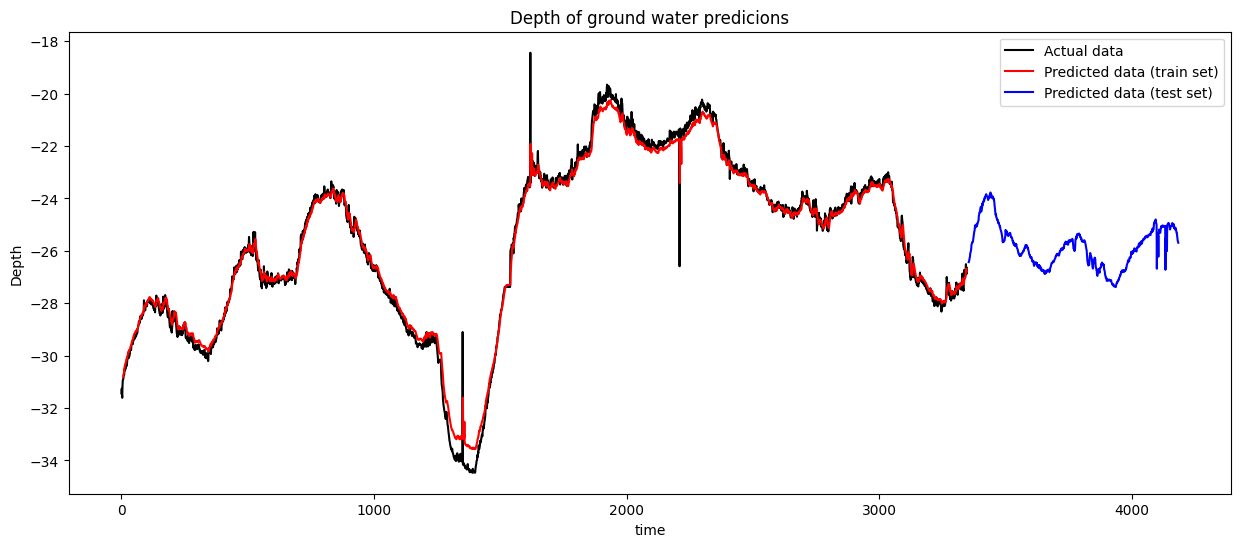

In [329]:
look_back = 7

# Ensure the arrays are of type float
trainPredPlot = np.empty_like(new_df, dtype=float)
trainPredPlot[:] = np.nan

trainPredPlot[look_back:len(train_predict)+look_back] = train_predict.flatten()

testPredictPlot = np.empty_like(new_df, dtype=float)
testPredictPlot[:] = np.nan

test_start = len(new_df) - len(test_predict)
testPredictPlot[test_start:] = test_predict.flatten()
original_scaled_data = scaler.inverse_transform(train_data)

plt.figure(figsize=(15, 6))
plt.plot(original_scaled_data, color='black', label="Actual data")
plt.plot(trainPredPlot, color='red', label="Predicted data (train set)")
plt.plot(testPredictPlot, color='blue', label="Predicted data (test set)")

plt.title("Depth of ground water predicions")
plt.xlabel("time")
plt.ylabel("Depth")
plt.legend()
plt.show()


### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [330]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1),
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

C:\Users\abo_O\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 7, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 7, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [331]:
model.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1197
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0053
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0033
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0028
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0026
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0025
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0024
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0024
Epoch 10/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0023
Epoch 11/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022
Epoch 12/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0021
Epoch 13/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0022
Epoch 14/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0021
Epoch 15/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0020
Epoch 16/50
53/53

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [332]:
dataset_total = pd.concat((df['Depth_to_Groundwater_P24'][:train_size], df['Depth_to_Groundwater_P24'][train_size:]), axis=0)
inputs = dataset_total[len(dataset_total)-len(test_data)-7:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [333]:
len(test_data)

838

In [334]:
X_test = []
for i in range(7,845):
    X_test.append(inputs[i-7:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
pred_cong = model.predict(X_test)
pred_cong = scaler.inverse_transform(pred_cong)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

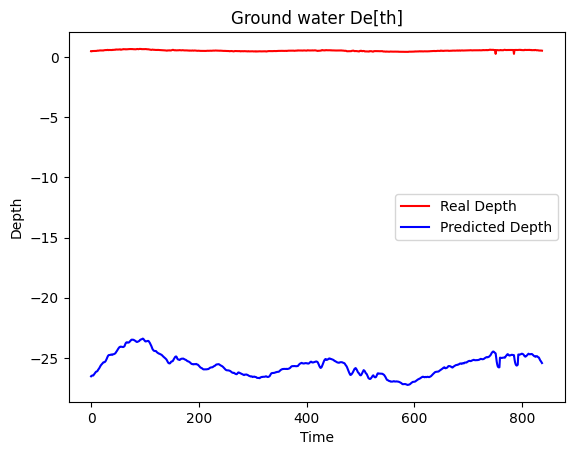

In [335]:
plot_pred(test_data, pred_cong)

In [336]:
return_rmse(test_data, pred_cong)

The root mean squared error is 26.13462322051426.


## Conclusion and Interpretation

Write your conclusions based on the model's performance and the forecast.

**Instructions:**
- Interpret the results and discuss the effectiveness of your model.
- Suggest potential improvements.

the rnn model looks good but the figure on LSTM doesn't maybe I shoud try adding more columns or redusing the complextiy 8 units insted of 50 both model had RMSE of 26 wich made me think of preproceesing isues IDK i should try many things like GRU , SARIMA and ARIMA for now this is my subbmision 